In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
x = pd.read_csv('Car details v3.csv')

In [ ]:
x.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
x.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


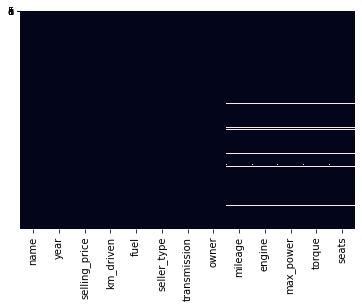

In [ ]:
sns.heatmap(x.isna(), yticklabels='False',cbar = False) 

# heatmap of null values in train data

In [ ]:
x.isna().any().value_counts()#number of columns having null values in data

False    8
True     5
dtype: int64

In [ ]:
for i in x:
  if x[i].isna().any():
    print(i,  x[i].isna().value_counts()[1],x[i].dtype)

# shows column name , null values in it, and data type of train 

mileage 221 object
engine 221 object
max_power 215 object
torque 222 object
seats 221 float64


In [ ]:
for i in x:
  if x[i].any() :
    if x[i].dtype == 'float64':
      x[i].fillna(value=x[i].mean(),inplace=True)
      
    else:
      x[i].fillna(value=x[i].mode()[0],inplace=True)

# fills null values
# if column is having float data type then it will fill null values by geting mean of column
# and if column in having object data type then it will fill out by taking mode 

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   object 
 9   engine         8128 non-null   object 
 10  max_power      8128 non-null   object 
 11  torque         8128 non-null   object 
 12  seats          8128 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


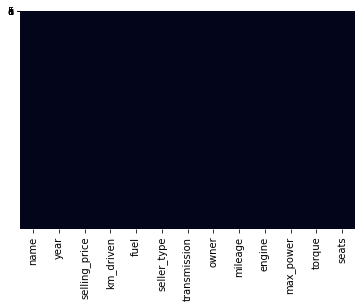

In [ ]:
sns.heatmap(x.isna(), yticklabels='False',cbar = False) 

# heatmap of null values in train data

In [ ]:

x['engine']=x['engine'].replace(' CC','',regex=True).str.replace(',', '')

In [ ]:
x['engine'] = pd.to_numeric(x['engine'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


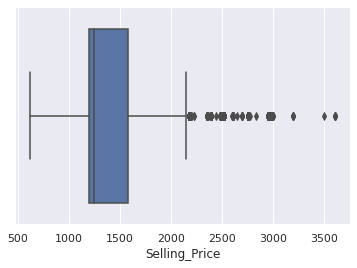

In [ ]:
sns.boxplot(x['engine'])
sns.set(style="darkgrid")

plt.xlabel('Selling_Price')
plt.show()


In [ ]:
Q1 = x['engine'].quantile(0.25)
Q3 = x['engine'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

x[x['engine']> upper_limit]
x[x['engine']< lower_limit]

x = x[x['engine'] < upper_limit]
x.shape

(6945, 13)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Selling_Price')

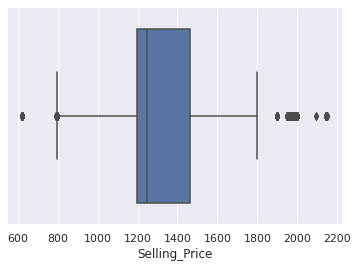

In [ ]:
sns.boxplot(x['engine'])
plt.xlabel('Selling_Price')

In [ ]:
x['mileage']=x['mileage'].replace(' km/kg','',regex=True).str.replace(',', '')
x['mileage']=x['mileage'].replace(' kmpl','',regex=True).str.replace(',', '')

x['mileage'] = pd.to_numeric(x['mileage'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Selling_Price')

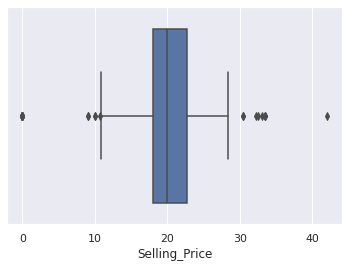

In [ ]:
sns.boxplot(x['mileage'])
plt.xlabel('Selling_Price')

In [ ]:
Q1 = x['mileage'].quantile(0.25)
Q3 = x['mileage'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

x[x['mileage']> upper_limit]
x[x['mileage']< lower_limit]

x = x[x['mileage'] < upper_limit]
x.shape

(6936, 13)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'mileage')

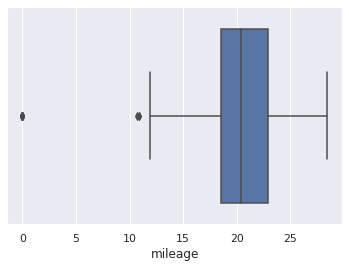

In [82]:
sns.boxplot(x['mileage'])
plt.xlabel('mileage')

In [ ]:
x['max_power']=x['max_power'].replace(' bhp','',regex=True).str.replace(',', '')
x['max_power'] = pd.to_numeric(x['max_power'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Selling_Price')

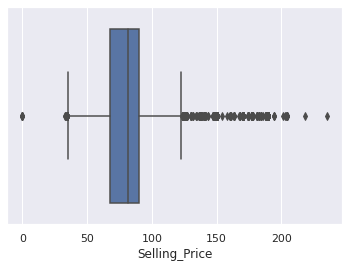

In [ ]:
sns.boxplot(x['max_power'])
plt.xlabel('Selling_Price')

In [ ]:
Q1 = x['max_power'].quantile(0.25)
Q3 = x['max_power'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

x[x['max_power']> upper_limit]
x[x['max_power']< lower_limit]

x = x[x['max_power'] < upper_limit]
x.shape

(6322, 13)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'max_power')

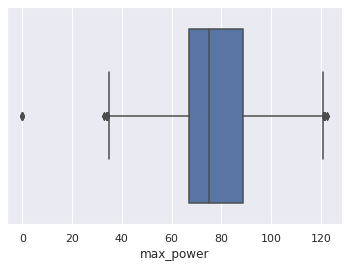

In [80]:
sns.boxplot(x['max_power'])
plt.xlabel('max_power')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Selling_Price')

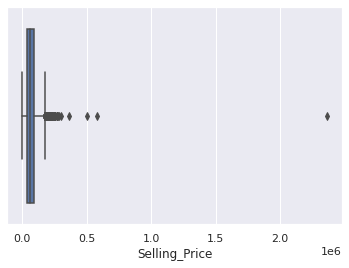

In [ ]:
sns.boxplot(x['km_driven'])
plt.xlabel('Selling_Price')

In [ ]:
Q1 = x['km_driven'].quantile(0.25)
Q3 = x['km_driven'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

x[x['km_driven']> upper_limit]
x[x['km_driven']< lower_limit]

x = x[x['km_driven'] < upper_limit]
x.shape

(6189, 13)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'km_driven')

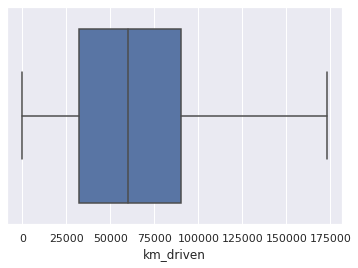

In [81]:
sns.boxplot(x['km_driven'])
plt.xlabel('km_driven')

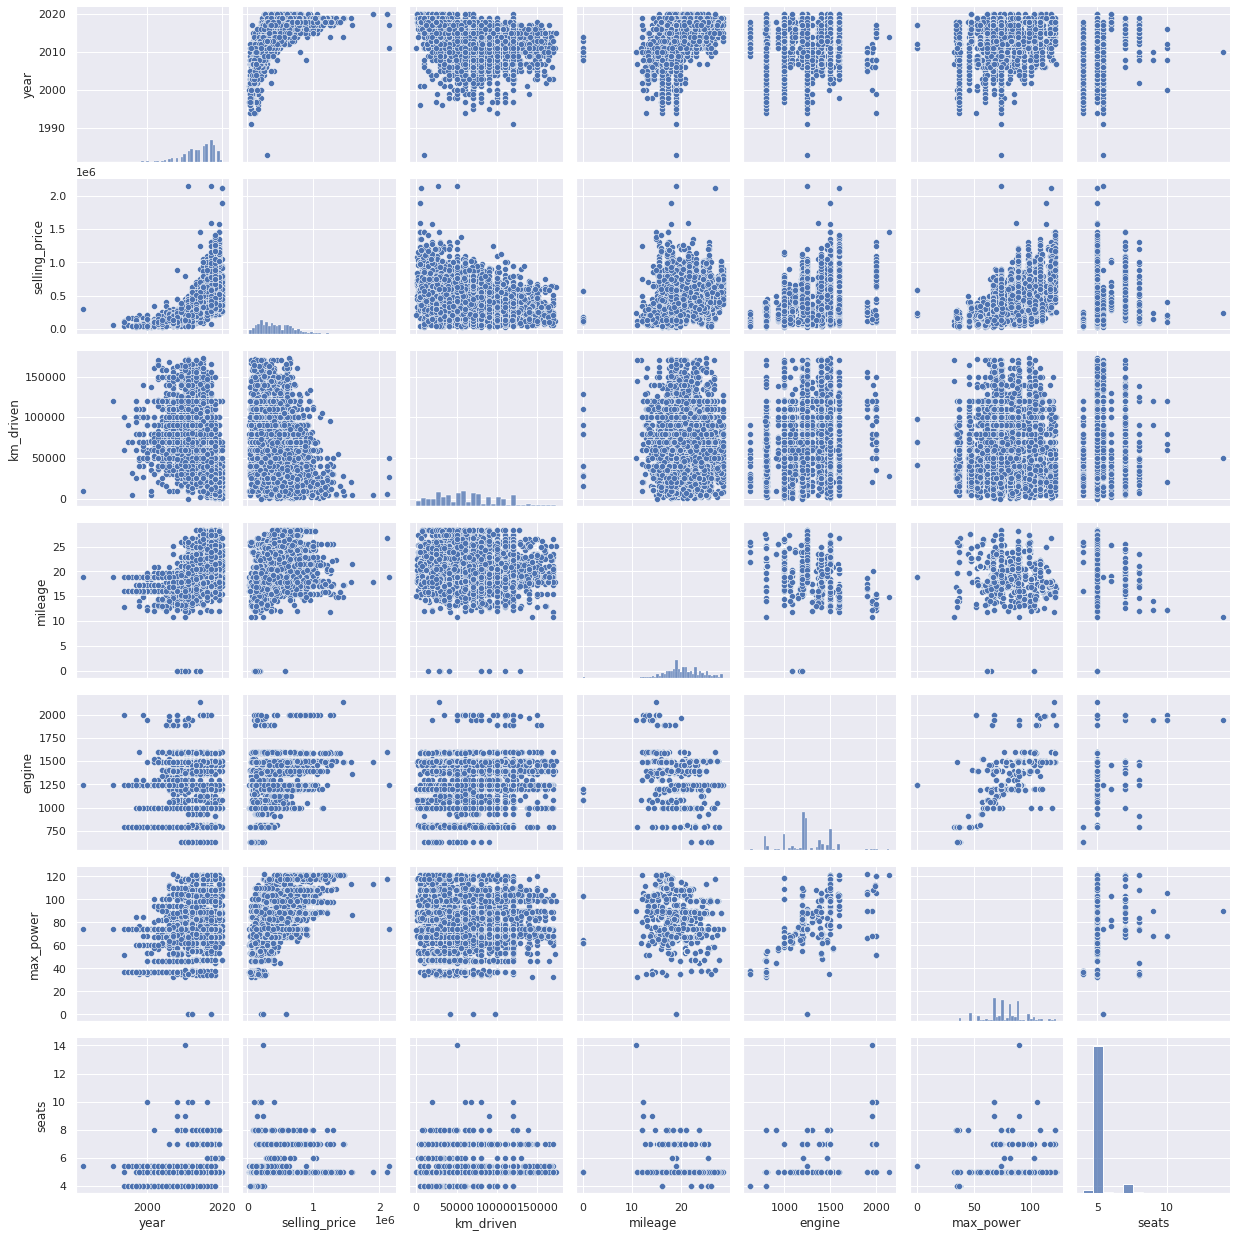

In [ ]:
sns.pairplot(x)


In [ ]:
correlation = x.corr()
correlation


,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.708742,-0.488131,0.396822,0.085382,0.296652,0.116750
selling_price,0.708742,1.000000,-0.380615,0.255069,0.408757,0.601289,0.188563
km_driven,-0.488131,-0.380615,1.000000,-0.074276,0.184925,-0.046016,0.049573
mileage,0.396822,0.255069,-0.074276,1.000000,-0.154489,-0.114272,-0.117702
engine,0.085382,0.408757,0.184925,-0.154489,1.000000,0.787895,0.227209
max_power,0.296652,0.601289,-0.046016,-0.114272,0.787895,1.000000,0.170921
seats,0.116750,0.188563,0.049573,-0.117702,0.227209,0.170921,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Selling_Price')

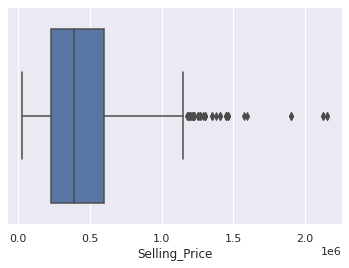

In [83]:
sns.boxplot(x['selling_price'])
plt.xlabel('Selling_Price')

In [85]:
from re import X
Q1 = x['selling_price'].quantile(0.25)
Q3 = x['selling_price'].quantile(0.75)
IQR = Q3 - Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

x[x['selling_price']> upper_limit]
x[x['selling_price']< lower_limit]

x = x[x['selling_price'] < upper_limit]
x.shape

(6139, 13)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Selling_Price')

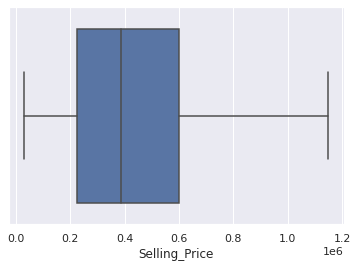

In [86]:
sns.boxplot(x['selling_price'])
plt.xlabel('Selling_Price')